<a href="https://colab.research.google.com/github/whoreallylovesme/Student-s-exams-score/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Загружаем дата-сет

import kagglehub
spscientist_students_performance_in_exams_path = kagglehub.dataset_download('spscientist/students-performance-in-exams')

print('Data source import complete.')


Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [ ]:
import pandas as pd

# Читаем дата-сет
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

# Посмотрим на первые 5 строк таблицы
print(df.head())

print("=" * 80)

# Статистическая информация
print(df.describe())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.163

## Как устроен дата-сет
Как было видно выше, дата-сет представляет из себя набор данных по тому, как студенты проявляют себя в задачах по письму, чтению и математике. Также есть данные по их поле, уровню образования родителей, получаемому обеду и подготовительному курсу.

In [ ]:
# Нет ли испорченных данных
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


## Предобработка
Я убедился, что все данные на месте и готовы к дальнейшему анализу.

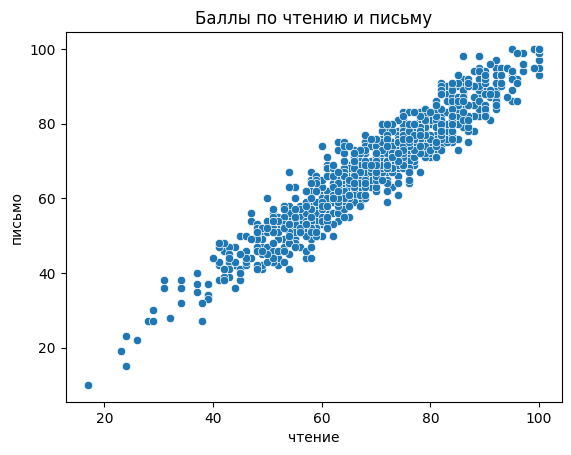

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# График зависимости баллов по чтению и написанию
sns.scatterplot(data=df, x='reading score', y='writing score')
plt.title('Баллы по чтению и письму')
plt.xlabel('чтение')
plt.ylabel('письмо')
plt.show()

##Зависимость между чтением и письмом
Здесь я исследовал, как связаны между собой успеваемости по данным дисциплинам.
Из графика видна сильная зависимость между успеваемостью по чтению и по письму. Тот, кто хорош в одном, хорош и в другом.

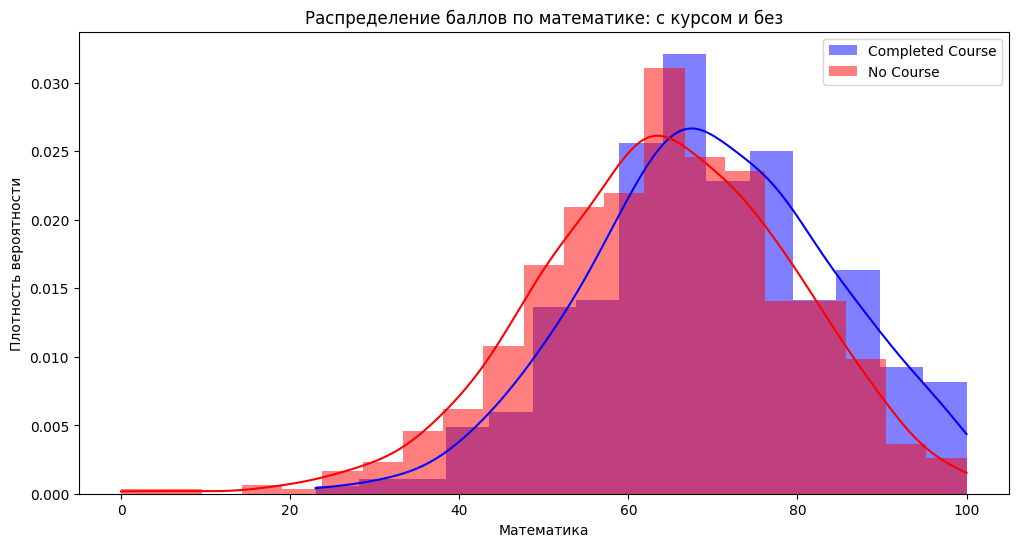

In [ ]:
# Разделим данные на две группы
prep_course = df[df['test preparation course'] == 'completed']
no_prep_course = df[df['test preparation course'] == 'none']

# Построим гистограмму для каждой группы по разным предметам
plt.figure(figsize=(12, 6))

sns.histplot(prep_course['math score'], color='blue', label='Completed Course', kde=True, stat="density", linewidth=0)
sns.histplot(no_prep_course['math score'], color='red', label='No Course', kde=True, stat="density", linewidth=0)

plt.title('Распределение баллов по математике: с курсом и без')
plt.xlabel('Математика')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


##Подготовительные курсы имеют значение
Подготовительные курсы дают ощутимый эффект. Студенты, прошедшие курс подготовки, в среднем показывают результаты лучше. Особенно важна подготовка у высокобалльников, как видно из графика.

<ipython-input-25-af2234168dde>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='math score', data=df, palette='Blues')
<ipython-input-25-af2234168dde>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='reading score', data=df, palette='Reds')
<ipython-input-25-af2234168dde>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='writing score', data=df, palette='Greens')


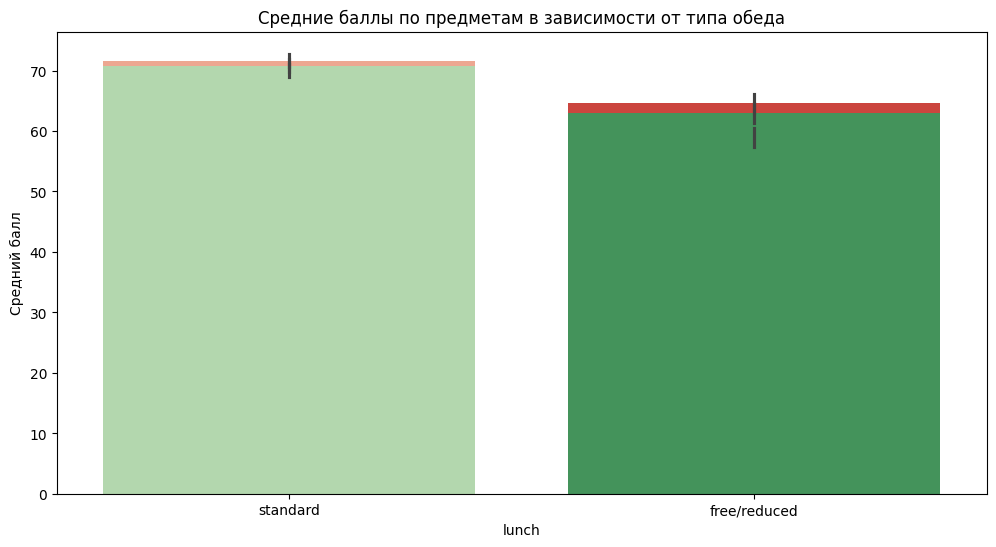

In [ ]:
plt.figure(figsize=(12, 6))

# Сравнение среднего балла для всех предметов в зависимости от типа обеда
sns.barplot(x='lunch', y='math score', data=df, palette='Blues')
sns.barplot(x='lunch', y='reading score', data=df, palette='Reds')
sns.barplot(x='lunch', y='writing score', data=df, palette='Greens')

plt.title('Средние баллы по предметам в зависимости от типа обеда')
plt.ylabel('Средний балл')
plt.show()


##Обед тоже важен
Неожиданно, но те, кто получают стандартную порцию обеда, в среденем показывают себя лучше остальных.

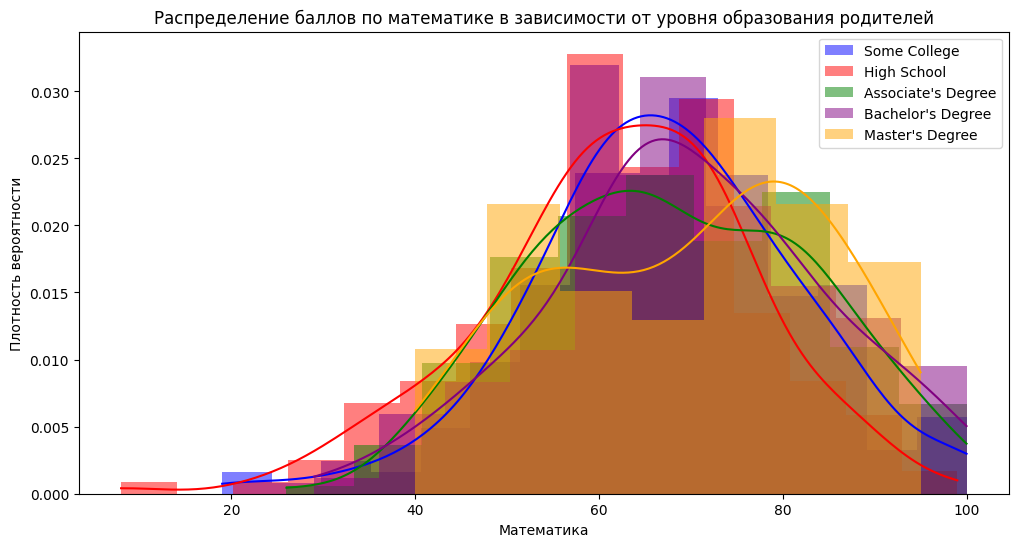

In [ ]:
plt.figure(figsize=(12, 6))

# Гистограмма для разных уровней образования родителей
sns.histplot(df[df['parental level of education'] == "some college"]['math score'], color='blue', label='Some College', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['parental level of education'] == "high school"]['math score'], color='red', label='High School', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['parental level of education'] == "associate\'s degree"]['math score'], color='green', label='Associate\'s Degree', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['parental level of education'] == "bachelor\'s degree"]['math score'], color='purple', label='Bachelor\'s Degree', kde=True, stat="density", linewidth=0)
sns.histplot(df[df['parental level of education'] == "master\'s degree"]['math score'], color='orange', label='Master\'s Degree', kde=True, stat="density", linewidth=0)

plt.title('Распределение баллов по математике в зависимости от уровня образования родителей')
plt.xlabel('Математика')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()


##Уровень Образования Родителей
Из графика видно, что уровень образования родителей может оказывать значительное влияние на успеваемость детей по математике. Студенты с родителями, имеющими более высокое образование, как правило, показывают более высокие баллы, что может свидетельствовать о большем количестве ресурсов и поддержки, доступных таким студентам.

##Выводы
На данном дата-сете мною были рассмотрены зависимости между баллами по чтению и письму, влияние подготовительных курсов, обедов и уровню образования родителей на успеваемость